## **AUTHORS**

1. Pauline Kariuki
2. Norman Mwapea
3. Angela Chesire
4. Carlton Ogolla
5. Emmanuel Chol

## 1.BUSINESS UNDERSTANDING


### **1.1 OVERVIEW**

The United States has long been a cornerstone of Kenya’s public health funding, providing about $2.5 billion between 2020 and 2025, with 80% supporting health programs through USAID and PEPFAR. In January 2025, an executive order paused U.S. foreign aid, followed by sweeping budget cuts in July 2025, abruptly freezing most U.S.-funded health programs in Kenya. The impact was immediate: ART clinics closed, community HIV programs were halted, and essential prevention efforts like PrEP distribution and DREAMS support for adolescent girls were suspended. Globally, modeling suggests that sustained aid cuts could cause 10.8 million additional HIV infections and 2.9 million deaths by 2030. Regional data from Mozambique show a 15% rise in new infections and a 10% rise in HIV-related deaths following similar disruptions. The UNAIDS models warn of millions of new infections and deaths if donor funding stops. Kenya — a key PEPFAR partner — is already feeling the strain: clinic closures, staff layoffs, and reduced ART coverage.

**Our goal is to quantify Kenya’s specific impact: How much of this projected global rise in infections and deaths could occur here if aid cuts persist — and to build predictive models that help policymakers act early.**

### **1.2 BACKGROUND**

Kenya’s success in controlling HIV has been closely tied to external funding, especially through PEPFAR and USAID, which have financed ART programs, health worker salaries, and community prevention initiatives. The 2025 suspension of U.S. aid exposed the country’s heavy reliance on donor support, triggering job losses, service interruptions, and data system breakdowns.
Programs such as DREAMS, which helped keep 66,000 girls HIV-free, were paused, while ART clinics and community outreach services faced closure. These disruptions underscore a broader question of sustainability and resilience in Kenya’s health system. Understanding how changes in foreign aid affect HIV outcomes and the healthcare workforce is vital for developing adaptive, evidence-based funding strategies that can protect future public health gains.

### **1.3 KEY OBJECTIVES - Quantifying Kenya’s share of the global HIV impact**

**•	Kenya’s Projected Impact**

If global modeling predicts millions of new infections and deaths, what proportion of this burden might occur in Kenya? We will use a Time-Series Analysis – to track Kenya’s HIV trends (testing, ART coverage, mortality) before and after funding shifts.

**•	Aid–Outcome Relationships**

How have changes in U.S. funding levels historically correlated with:HIV testing rates, ART coverage, AIDS-related mortality in Kenya? We will use regression models (Multiple Linear, Ridge) – to estimate how much HIV outcomes change per unit drop in aid funding.

**•	County-Level Vulnerability**

Which counties or regions in Kenya are most dependent on donor funding, and therefore most vulnerable when aid is suspended? We will use clustering (K-Means) – to group counties based on aid dependency, workforce reliance, and health outcome sensitivity.

**•	Future Scenario Forecasting**

If foreign aid cuts persist or deepen:
1. How many new HIV infections could occur in Kenya (2025–2029)?
2. How many additional new infections per day compared to current trends?
3. How many AIDS-related deaths might result?
4. How many new child infections, child deaths, and orphans could emerge?
We will use predictive modeling (Random Forest, Gradient Boosting) – to simulate Kenya’s future infection and death counts under different funding scenarios.

### **1.4 SUCCESS METRICS**

Success will be defined through a mix of technical, analytical, and policy outcomes:
1.	**Model Accuracy:** Achieve ≥80% predictive accuracy (R² ≥ 0.8) in forecasting HIV infections, deaths, and ART coverage under various funding scenarios.
2.	**Data Quality:** Build a clean, verified, and reproducible dataset integrating aid, workforce, and HIV outcome data.
3.	**Insight Clarity:** Produce analyses that clearly demonstrate relationships between donor funding changes and health outcomes.
4.	**Policy Relevance:** Deliver actionable recommendations for the Ministry of Health, donors, and county health systems.
5.	**Scalability:** Ensure the framework is modular and reusable, allowing integration of new data sources such as PEPFAR, World Bank, and Kenya Health Data Portal datasets.

### **1.5 KEY STAKEHOLDERS**

1. **Kenya Ministry of Health (MOH)** – For strategic planning, resource allocation, and health workforce deployment.
2. **PEPFAR, USAID, and Global Fund** – For evaluating funding effectiveness and sustainability.
3. **County Governments** – For identifying vulnerable regions and planning localized responses.
4. **Local NGOs and Civil Society** – For evidence-based advocacy and program continuity.
5. **Data Scientists and Researchers** – For advancing models that link foreign aid dynamics to public health outcomes.

### **1.6 RELEVANCE TO KENYA**

This project is vital for Kenya’s public health resilience and policy planning. By quantifying how fluctuations in donor aid influence HIV outcomes and healthcare workforce stability, the analysis will help policymakers design sustainable, data-driven funding frameworks. The findings will inform strategies to maintain critical health services, reduce dependency on external aid, and safeguard Kenya’s progress toward ending the HIV epidemic.


## 2. DATA UNDERSTANDING

In [180]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Counting items
from collections import Counter

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
from sklearn.preprocessing import LabelEncoder, label_binarize , StandardScaler         # Encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD                                          # Dimensionality reduction
from sklearn.naive_bayes import MultinomialNB                                           # Naive Bayes
from sklearn.linear_model import LogisticRegression                                     # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree                              # Decision Tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    classification_report
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime import lime_tabular

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

In [181]:
# Loading the data set into a data frame
df = pd.read_csv("../Raw Data/usaid_kenya.csv")

# Displaying first 5 rows of the data
df

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,2,Obligations,2005,30SEP2005,28000,42057,8,Project-type interventions - not Investment Related,.,26757
1,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2005,30SEP2005,17875,26849,8,Project-type interventions - not Investment Related,.,26757
2,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01FEB2006,3469,5047,8,Project-type interventions - not Investment Related,.,26757
3,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01APR2006,1138,1655,8,Project-type interventions - not Investment Related,.,26757
4,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,...,3,Disbursements,2006,01MAY2006,394,573,8,Project-type interventions - not Investment Related,.,26757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80067,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,29,EPA,...,2,Obligations,2024,19AUG2024,64250,62579,13,Technical Cooperation - Other,614819,1121
80068,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2020,25SEP2020,1146864,1327370,13,Technical Cooperation - Other,1146864,276
80069,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2021,28SEP2021,282104,315641,13,Technical Cooperation - Other,282104,267
80070,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,38,DFC,...,2,Obligations,2024,02JAN2024,500000,486994,13,Technical Cooperation - Other,500000,235


##### *Observation:* From top to bottom, the data is uniform.

Our goal is to check how foreign aid cuts will affect Kenya from the time of this analysis - 2025, to the future. As such, we will check how recent and old our data is.

In [182]:
# Check for the shape of our data
print(f"The data has {df.shape[0]} entries and {df.shape[1]} features")

The data has 80072 entries and 56 features


In [183]:
# Check column names 
df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

##### *Observation:* The column names as inconsistent. They contain a mix of snake and camel case. There is need for standardization.

In [184]:
# Standardize column names so they are more intuitive
df.columns = (
    df.columns
    .str.strip()                     # remove leading/trailing spaces
    .str.lower()                     # make all lowercase
    .str.replace(' ', '_')           # replace spaces with underscores
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # remove special characters
)

df.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'managing_agency_id', 'managing_agency_acronym',
       'managing_agency_name', 'managing_subagency_or_bureau_id',
       'managing_subagency_or_bureau_acronym',
       'managing_subagency_or_bureau_name', 'implementing_partner_category_id',
       'implementing_partner_category_name',
       'implementing_partner_subcategory_id',
       'implementing_partner_subcategory_name', 'implementing_partner_id',
       'implementing_partner_name', 'international_category_id',
       'international_category_name', 'international_sector_code',
       'international_sector_name', 'international_purpose_code',
       'international_purpose_name', 'us_category_id', 'us_category_name',
       'us_sector_id', 'us_sector_name', 'funding_account_id',
       'funding_account_name', 'funding_agency_id', 'funding_agency_name',
       'funding_agency

In [185]:
# Checking for the data types and metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80072 entries, 0 to 80071
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_id                             80072 non-null  int64  
 1   country_code                           80072 non-null  object 
 2   country_name                           80072 non-null  object 
 3   region_id                              80072 non-null  int64  
 4   region_name                            80072 non-null  object 
 5   income_group_id                        80072 non-null  float64
 6   income_group_name                      80072 non-null  object 
 7   income_group_acronym                   80072 non-null  object 
 8   managing_agency_id                     80072 non-null  int64  
 9   managing_agency_acronym                80072 non-null  object 
 10  managing_agency_name                   80072 non-null  object 
 11  ma

##### *Observations:* 
1. The data is mostly categorical.  
2. It has some notable missing values.
3. Some columns will need typecasting such as:
    - fiscal_year to integer
    - transaction_date, activity_start_date, activity_end_date to datetime
    - activity_budget_amount to float
    - current_dollar_amount, constant_dollar_amount to float
    - international_sector_code, international_purpose_code to string
    - activity_project_number to string
4. There exist a number of unique identifiers. These offer little analytical value and will thus be dropped.

In [186]:
# ------- [Type Casting] -------
# Convert columns to their correct data types for analysis

# Fiscal year -> convert from object to integer
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'], errors='coerce').astype('Int64')

# Date columns -> convert to datetime format
date_cols = ['transaction_date', 'activity_start_date', 'activity_end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Numeric conversion for budget amount
df['activity_budget_amount'] = pd.to_numeric(df['activity_budget_amount'], errors='coerce')

# Financial columns -> cast to float for consistency in modeling
df['current_dollar_amount'] = df['current_dollar_amount'].astype(float)
df['constant_dollar_amount'] = df['constant_dollar_amount'].astype(float)

In [187]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
country_id,80072.0,404.0,404.0,404.0,404.0,404.0,404.0,0.0
region_id,80072.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
income_group_id,80072.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
managing_agency_id,80072.0,2.106417,1.0,1.0,1.0,1.0,38.0,3.373374
managing_subagency_or_bureau_id,80072.0,63.601009,2.0,19.0,19.0,21.0,999.0,181.821798
implementing_partner_category_id,80072.0,4.949258,1.0,3.0,4.0,8.0,8.0,2.931494
implementing_partner_subcategory_id,80072.0,11.125662,1.0,5.0,8.0,19.0,20.0,7.817254
implementing_partner_id,80072.0,3449361.432848,1000001.0,3990008.0,4000011.0,4001154.0,4021430.0,1144963.638087
international_category_id,80072.0,5.056574,1.0,2.0,3.0,9.0,10.0,3.282771
international_sector_code,80072.0,373.995342,111.0,134.0,152.0,720.0,998.0,306.316465


In [188]:
# Checking statistical summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
country_code,80072,1,KEN,80072
country_name,80072,1,Kenya,80072
region_name,80072,1,Sub-Saharan Africa,80072
income_group_name,80072,1,Lower Middle Income Country,80072
income_group_acronym,80072,1,LMIC,80072
managing_agency_acronym,80072,20,USAID,63735
managing_agency_name,80072,20,U.S. Agency for International Development,63735
managing_subagency_or_bureau_acronym,76894,63,AFR,53601
managing_subagency_or_bureau_name,80072,67,Bureau for Africa,52879
implementing_partner_category_name,80072,8,Enterprises,34906


In [189]:
# Print unique value counts for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

country_id: 1 unique values
country_code: 1 unique values
country_name: 1 unique values
region_id: 1 unique values
region_name: 1 unique values
income_group_id: 1 unique values
income_group_name: 1 unique values
income_group_acronym: 1 unique values
managing_agency_id: 20 unique values
managing_agency_acronym: 20 unique values
managing_agency_name: 20 unique values
managing_subagency_or_bureau_id: 67 unique values
managing_subagency_or_bureau_acronym: 63 unique values
managing_subagency_or_bureau_name: 67 unique values
implementing_partner_category_id: 8 unique values
implementing_partner_category_name: 8 unique values
implementing_partner_subcategory_id: 17 unique values
implementing_partner_subcategory_name: 17 unique values
implementing_partner_id: 888 unique values
implementing_partner_name: 888 unique values
international_category_id: 10 unique values
international_category_name: 10 unique values
international_sector_code: 30 unique values
international_sector_name: 30 unique valu

In [190]:
# Print the unique values themselves
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")


country_id: [404]

country_code: ['KEN']

country_name: ['Kenya']

region_id: [5]

region_name: ['Sub-Saharan Africa']

income_group_id: [2.]

income_group_name: ['Lower Middle Income Country']

income_group_acronym: ['LMIC']

managing_agency_id: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 29 38]

managing_agency_acronym: ['USAID' 'STATE' 'MCC' 'TREAS' 'AGR' 'HHS' 'DOD' 'DOI' 'DOJ' 'DOL' 'DOC'
 'DOE' 'DHS' 'DOT' 'PC' 'TDA' 'ADF' 'FTC' 'EPA' 'DFC']

managing_agency_name: ['U.S. Agency for International Development' 'Department of State'
 'Millennium Challenge Corporation' 'Department of the Treasury'
 'Department of Agriculture' 'Department of Health and Human Services'
 'Department of Defense' 'Department of the Interior'
 'Department of Justice' 'Department of Labor' 'Department of Commerce'
 'Department of Energy' 'Department of Homeland Security'
 'Department of Transportation' 'Peace Corps'
 'Trade and Development Agency' 'African Development Foundation'
 'Federal Trade

## 3. DATA PREPARATION 

Data preparation will majorly entail two parts:
1. Data wrangling which will entail checking for and removing missing values and duplicates and
2. Feature engineering.

Before that, however, we will check how old and recent our data is and filter to only have data from the present (2025) to 15 years in the past.

In [191]:
# Check the data recency
fiscal_min, fiscal_max = df['fiscal_year'].agg(['min', 'max'])
print(f"Data covers fiscal years from {fiscal_min} to {fiscal_max}.")

Data covers fiscal years from 1954 to 2025.


We have 71 years worth of data! We don't as much so we will first create a copy of the data to avoid modifying the original then filter to have our target data.

In [192]:
# Create a copy of the data
data = df.copy(deep=True)

# Filter the data to include only years from 2010 to 2025
data = data[(data['fiscal_year'] >= 2010) & (data['fiscal_year'] <= 2025)]

# Sanity check
fiscal_min, fiscal_max = data['fiscal_year'].agg(['min', 'max'])
print(f"Filtered data covers fiscal years from {fiscal_min} to {fiscal_max}.")

Filtered data covers fiscal years from 2010 to 2025.


Perfect. Now we begin the tedious work that is cleaning.

### 3.1 Data Cleaning

#### 3.1.1 Handling Duplicate Values

We will start by confirming the number of duplicates.

In [193]:
# Checking for duplicate values
print("Duplicate records:", data.duplicated().sum())

Duplicate records: 6


There are 6 duplicates. We will drop them and preview our changes.

In [194]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Sanity check
print("Duplicates after cleaning:", data.duplicated().sum())

Duplicates after cleaning: 0


#### 3.1.2 Handling Missing Values

In [195]:
# Checking for missing values
data.isna().sum()

country_id                                   0
country_code                                 0
country_name                                 0
region_id                                    0
region_name                                  0
income_group_id                              0
income_group_name                            0
income_group_acronym                         0
managing_agency_id                           0
managing_agency_acronym                      0
managing_agency_name                         0
managing_subagency_or_bureau_id              0
managing_subagency_or_bureau_acronym      2434
managing_subagency_or_bureau_name            0
implementing_partner_category_id             0
implementing_partner_category_name           0
implementing_partner_subcategory_id          0
implementing_partner_subcategory_name        0
implementing_partner_id                      0
implementing_partner_name                    0
international_category_id                    0
international

In [196]:
# Drop unique identifier columns
data = data.loc[:, ~data.columns.str.contains('id', case=False)]

# Drop columns that offer little analytical value
redundant_cols = [
    'country_code', 'region_name', 'income_group_name', 'income_group_acronym',
    'international_sector_code', 'international_purpose_code',
    'activity_project_number', 'activity_name', 'activity_description',
    'funding_account_name', 'managing_agency_acronym', 'funding_agency_acronym',
    'international_sector_name', 'international_purpose_name', 'activity_budget_amount', 
    'implementing_partner_subcategory_name', 'international_category_name',
    'activity_start_date', 'activity_end_date'
]

data.drop(columns=redundant_cols, inplace=True)

Since we already have the managing subagency or bureau name, the managing subagency or bureau acronym is redundant. We will drop this column.

In [197]:
# Drop managing_subagency_or_bureau_acronym
data.drop(columns='managing_subagency_or_bureau_acronym',inplace=True)

In [198]:
data.isna().sum()

country_name                             0
managing_agency_name                     0
managing_subagency_or_bureau_name        0
implementing_partner_category_name       0
implementing_partner_name                0
us_category_name                         0
us_sector_name                           0
funding_agency_name                      0
foreign_assistance_objective_name        0
transaction_type_name                    0
fiscal_year                              0
transaction_date                      2044
current_dollar_amount                    0
constant_dollar_amount                   0
dtype: int64

With these columns dropped, we can deal with other columns that had missing values but were too little to make us drop them and or may be too important to drop. For example, the transaction_date column.It may play a crucial role in time series modeling and forecasting. We will use the fiscal_year column to impute the nulls in it.

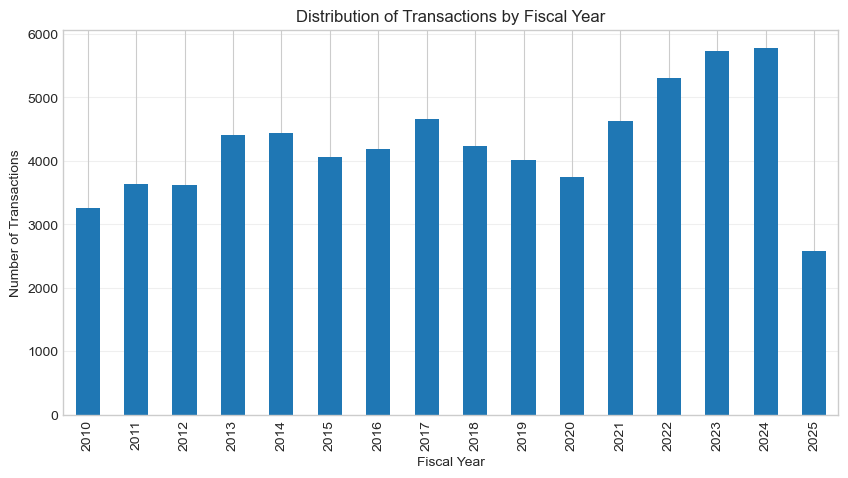

In [ ]:

plt.figure(figsize=(10,5))
data['fiscal_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Transactions by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.3)
plt.show()

<Axes: title={'center': 'Post-Imputation Transaction Year Distribution'}, xlabel='transaction_year'>

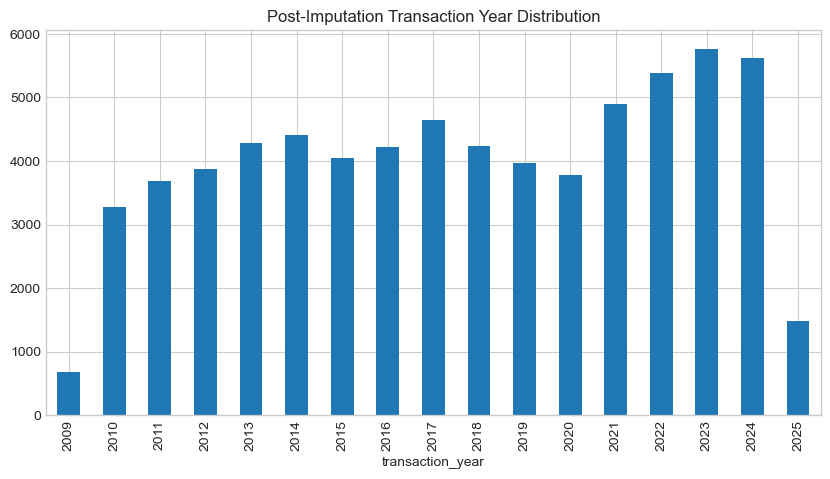

In [200]:
# Fill missing with mid-fiscal-year date (April 1)
data['transaction_date'] = data.apply(
    lambda row: pd.Timestamp(f"{int(row['fiscal_year'])}-04-01")
    if pd.isna(row['transaction_date']) else row['transaction_date'],
    axis=1
)

data['transaction_year'] = data['transaction_date'].dt.year
data['transaction_year'].value_counts().sort_index().plot(
    kind='bar', figsize=(10,5), title='Post-Imputation Transaction Year Distribution'
)

In [122]:
# Clean the Fiscal Year column first
data['fiscal_year'] = data['fiscal_year'].astype(str).str.extract(r'(\d{4})', expand=False)

# Coverting Transaction Date to datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')

# Appending Fiscal Year with 01-01
data['fiscal_year'] = pd.to_datetime(data['fiscal_year'] + '-01-01', errors='coerce')

# Filling missing Transaction Date  missing values
data['transaction_date'] = data['transaction_date'].fillna(data['fiscal_year'])

In [123]:
# Checking if there are any missing values left in Transaction Date
data['transaction_date'].isna().sum()

np.int64(0)

In [124]:
# Converting back to the year
data['fiscal_year'] = pd.to_datetime(data['fiscal_year'])
data['fiscal_year'] = data['fiscal_year'].dt.year

In [125]:
# Checking for missing values
data.isna().sum()

country_name                          0
managing_agency_name                  0
managing_subagency_or_bureau_name     0
implementing_partner_category_name    0
implementing_partner_name             0
us_category_name                      0
us_sector_name                        0
funding_agency_name                   0
foreign_assistance_objective_name     0
transaction_type_name                 0
fiscal_year                           0
transaction_date                      0
current_dollar_amount                 0
constant_dollar_amount                0
dtype: int64

##### We may also remove columns that may be redundant for our analysis. These are columns that give no information differentiating other columns. A starting point may be columns with only one unique value for example we may not need a column for 'Country Name' since our data contains information about Kenya only.

##### We will also get rid of columns that may contain similar information like Managing Agency Name and Managing Sub-agency or Bureau Name

### 3.2 Feature Engineering

#### We could convert the Current Dollar Amount into Categorical data which may be simpler to use during modelling

In [126]:
data['transaction_size']=pd.qcut(data['current_dollar_amount'],\
                                 q=3, labels=['Low','Medium','High'] )

In [127]:
data.head()

,country_name,managing_agency_name,managing_subagency_or_bureau_name,implementing_partner_category_name,implementing_partner_name,us_category_name,us_sector_name,funding_agency_name,foreign_assistance_objective_name,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,transaction_size
11,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Obligations,2010,2010-06-01,-471.0,-642.0,Low
27,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Obligations,2010,2009-10-01,-144624.0,-196858.0,Low
28,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Obligations,2010,2010-01-01,29511.0,40169.0,Medium
29,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Obligations,2010,2010-03-01,198105.0,269655.0,High
30,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Basic Education,U.S. Agency for International Development,Economic,Obligations,2010,2010-04-01,11571.0,15750.0,Medium


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68264 entries, 11 to 80071
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   country_name                        68264 non-null  object        
 1   managing_agency_name                68264 non-null  object        
 2   managing_subagency_or_bureau_name   68264 non-null  object        
 3   implementing_partner_category_name  68264 non-null  object        
 4   implementing_partner_name           68264 non-null  object        
 5   us_category_name                    68264 non-null  object        
 6   us_sector_name                      68264 non-null  object        
 7   funding_agency_name                 68264 non-null  object        
 8   foreign_assistance_objective_name   68264 non-null  object        
 9   transaction_type_name               68264 non-null  object        
 10  fiscal_year               

In [129]:
data['foreign_assistance_objective_name'].unique()

array(['Economic', 'Military'], dtype=object)

##### We could change the name of columns like 'Foreign Assistance Objective Name' to objective in short for it to be simpler to deal with.

In [130]:
# Renaming the column
data = data.rename(columns={'foreign_assistance_objective_name': 'objective'})

In [131]:
data['us_sector_name'].unique()

array(['Basic Education',
       'Pandemic Influenza and Other Emerging Threats (PIOET)',
       'Direct Administrative Costs', 'Malaria',
       'Maternal and Child Health',
       'Family Planning and Reproductive Health', 'HIV/AIDS',
       'Water Supply and Sanitation', 'Good Governance', 'Civil Society',
       'Rule of Law and Human Rights',
       'Political Competition and Consensus-Building',
       'Counter-Terrorism', 'Conflict Mitigation and Reconciliation',
       'Policies, Regulations, and Systems', 'Social Assistance',
       'Financial Sector', 'Economic Opportunity',
       'Private Sector Competitiveness', 'Trade and Investment',
       'Agriculture', 'Natural Resources and Biodiversity',
       'Clean Productive Environment', 'Monitoring and Evaluation',
       'Macroeconomic Foundation for Growth', 'Tuberculosis', 'Nutrition',
       'Higher Education', 'Disaster Readiness', 'Social Services',
       'Protection, Assistance and Solutions',
       'Other Public Heal

In [132]:
data['us_sector_name'] = data['us_sector_name'].str.strip().str.lower()
mapping1 = {
    'Health': [
        'Other Public Health Threats', 'Pandemic Influenza and Other Emerging Threats (PIOET)',
        'Malaria', 'Maternal and Child Health', 'Family Planning and Reproductive Health',
        'HIV/AIDS', 'Social Assistance' , 'Water Supply and Sanitation', 'Tuberculosis', 'Nutrition', 'Health - General'
    ],
    'Education': [
        'Basic Education', 'Higher Education', 'Education and Social Services - General'
    ],
    'Security': [
        'Counter-Terrorism', 'Conflict Mitigation and Reconciliation', 'Transnational Crime',
        'Stabilization Operations and Security Sector Reform', 'Peace and Security - General',
        'Counter-Narcotics', 'Combating Weapons of Mass Destruction (WMD)'
    ],
    'Politics': [
        'Good Governance', 'Civil Society', 'Political Competition and Consensus-Building',
        'Democracy, Human Rights, and Governance - General'
    ],
    'Human Rights': [
        'Rule of Law and Human Rights', 'Protection, Assistance and Solutions',
        'Migration Management'
    ],
    'Environment': [
        'Natural Resources and Biodiversity', 'Clean Productive Environment',
        'Environment - General', 'Environment', 'Mining and Natural Resources'
    ],
    'Agriculture': [
        'Agriculture'
    ],
    'Economy': [
        'Economic Opportunity'
    ],
    'Development': [
        'Infrastructure'
    ]
}
# This is a code that categorises every value with the category given in the map
def assign_category(text_entry):

    # Handle empty or non-string data
    if not isinstance(text_entry, str):
        return 'Other/Unspecified'

    text_lower = text_entry.lower()

    # Iterate through the main categories and their associated phrases
    for category, phrases in mapping1.items():
        for phrase in phrases:
            # Check if any phrase is present in the text entry
            if phrase.lower() in text_lower:
                return category  # Return the high-level category and stop searching

    # If no match is found after checking all categories
    return 'Other/Unspecified'

data["us_sector"] = data["us_sector_name"].apply(assign_category)
data.head()

,country_name,managing_agency_name,managing_subagency_or_bureau_name,implementing_partner_category_name,implementing_partner_name,us_category_name,us_sector_name,funding_agency_name,objective,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,transaction_size,us_sector
11,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Obligations,2010,2010-06-01,-471.0,-642.0,Low,Education
27,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Obligations,2010,2009-10-01,-144624.0,-196858.0,Low,Education
28,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Obligations,2010,2010-01-01,29511.0,40169.0,Medium,Education
29,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Obligations,2010,2010-03-01,198105.0,269655.0,High,Education
30,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,basic education,U.S. Agency for International Development,Economic,Obligations,2010,2010-04-01,11571.0,15750.0,Medium,Education


In [133]:
data.drop(columns=['us_sector_name'], inplace=True)

In [134]:
print('Unique values in funding_agency_name:', data['funding_agency_name'].nunique())
print('Unique values in managing_agency_name:', data['managing_agency_name'].nunique())

Unique values in funding_agency_name: 21
Unique values in managing_agency_name: 20


#### We can combine the columns 'Managing Agency Name' and 'Funding Agency Name' by making the entries in the combined column a statement.

In [135]:
data['funded_and_managed_by']=(data['funding_agency_name'].astype(str).fillna('')+ \
                                  ' managed by ' + data['managing_agency_name'].astype(str).fillna('')
                                  )

data.head(2)

,country_name,managing_agency_name,managing_subagency_or_bureau_name,implementing_partner_category_name,implementing_partner_name,us_category_name,funding_agency_name,objective,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,transaction_size,us_sector,funded_and_managed_by
11,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Obligations,2010,2010-06-01,-471.0,-642.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development
27,Kenya,U.S. Agency for International Development,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,U.S. Agency for International Development,Economic,Obligations,2010,2009-10-01,-144624.0,-196858.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development


In [136]:
data.drop(columns=['funding_agency_name','managing_agency_name'],inplace=True)

data.head(2)

,country_name,managing_subagency_or_bureau_name,implementing_partner_category_name,implementing_partner_name,us_category_name,objective,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,transaction_size,us_sector,funded_and_managed_by
11,Kenya,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Obligations,2010,2010-06-01,-471.0,-642.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development
27,Kenya,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Obligations,2010,2009-10-01,-144624.0,-196858.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development


#### We can also combine the 'Implementing Partner Category Name' with the 'Implementing Partner Name' 

In [137]:
data['Implemented_and_assisted_by']=(data['implementing_partner_name'].astype(str).fillna('') + \
                                  ' and assisted by ' + data['implementing_partner_category_name'].astype(str).fillna('')
                                  )

data.head(2)

,country_name,managing_subagency_or_bureau_name,implementing_partner_category_name,implementing_partner_name,us_category_name,objective,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,transaction_size,us_sector,funded_and_managed_by,Implemented_and_assisted_by
11,Kenya,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Obligations,2010,2010-06-01,-471.0,-642.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government
27,Kenya,Bureau for Africa,Government,U.S. Government - U.S. Agency for International Development,Education and Social Services,Economic,Obligations,2010,2009-10-01,-144624.0,-196858.0,Low,Education,U.S. Agency for International Development managed by U.S. Agency for International Development,U.S. Government - U.S. Agency for International Development and assisted by Government


In [138]:
data.drop(columns=['implementing_partner_name','implementing_partner_category_name'], inplace=True)

In [139]:
# Save the file as a csv document
data1 = pd.DataFrame(data)
data1.to_csv('cleaned_data.csv',index=False)